# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [31]:
# Import relevant packages
import pandas as pd
import numpy as np

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [32]:
# Import data
aqi=pd.read_csv("c4_epa_air_quality.csv")

aqi=aqi.dropna()

aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [33]:
# Code Here

aqi.describe()


,Unnamed: 0,arithmetic_mean,aqi
count,257.000000,257.000000,257.000000
mean,129.766537,0.404578,6.782101
std,74.675286,0.319311,7.091422
min,0.000000,0.000000,0.000000
25%,66.000000,0.200000,2.000000
50%,130.000000,0.278947,5.000000
75%,194.000000,0.516667,9.000000
max,259.000000,1.921053,50.000000


In [34]:
# Code Here

aqi.describe()

print(aqi.shape)

(257, 10)


In [35]:
# Code Here
aqi.groupby('state_name').describe()

Unnamed: 0                                                \
                          count        mean         std    min     25%    50%   
state_name                                                                      
Alabama                     1.0   71.000000         NaN   71.0   71.00   71.0   
Alaska                      2.0  240.500000    3.535534  238.0  239.25  240.5   
Arizona                    14.0  131.714286   88.793995    0.0   67.50  140.5   
Arkansas                    1.0  186.000000         NaN  186.0  186.00  186.0   
California                 66.0  137.272727   69.667020   16.0   76.25  144.0   
Colorado                    9.0  119.333333   80.614825    9.0   56.00   97.0   
Connecticut                 4.0  119.250000   94.757146   15.0   82.50  108.5   
Delaware                    1.0  135.000000         NaN  135.0  135.00  135.0   
District Of Columbia        2.0  219.000000   50.911688  183.0  201.00  219.0   
Florida                    12.0  149.000000   66.311935   39.0  109.00  153.0   
Georgia                     2.0  139.000000  125.865007   50.0   94.50  139.0   
Hawaii                      3.0    6.333333    1.527525    5.0    5.50    6.0   
Idaho                       2.0   96.000000   82.024387   38.0   67.00   96.0   
Illinois                    3.0  127.000000   86.156834   28.0   98.00  168.0   
Indiana                     5.0  135.600000   92.629909   11.0   68.00  164.0   
Iowa                        3.0   28.333333   28.711206    4.0   12.50   21.0   
Kansas                      1.0   29.000000         NaN   29.0   29.00   29.0   
Kentucky                    3.0  148.000000   94.873600   84.0   93.50  103.0   
Louisiana                   1.0  152.000000         NaN  152.0  152.00  152.0   
Maine                       2.0  108.500000  101.116270   37.0   72.75  108.5   
Maryland                    4.0  105.000000   82.732501   30.0   66.00   83.5   
Massachusetts               4.0   94.000000   58.109093   36.0   48.00   97.5   
Michigan                    9.0  172.666667   64.625846   65.0  123.00  192.0   
Minnesota                   7.0   94.142857   82.197787   10.0   33.00   73.0   
Mississippi                 1.0  160.000000         NaN  160.0  160.00  160.0   
Missouri                    3.0   72.333333   59.534304   14.0   42.00   70.0   
Montana                     2.0  121.500000    9.192388  115.0  118.25  121.5   
Nebraska                    1.0   66.000000         NaN   66.0   66.00   66.0   
Nevada                      4.0   55.500000   40.796242   17.0   23.00   52.5   
New Hampshire               2.0  163.500000   24.748737  146.0  154.75  163.5   
New Jersey                  6.0  106.666667   55.913028   32.0   64.75  113.0   
New Mexico                  2.0  199.500000   53.033009  162.0  180.75  199.5   
New York                   10.0  165.800000   43.898367   90.0  134.75  177.5   
North Carolina              4.0  127.000000   92.372435   54.0   69.00   97.5   
North Dakota                1.0  108.000000         NaN  108.0  108.00  108.0   
Ohio                       12.0  128.666667   96.437765    1.0   43.75  134.5   
Oklahoma                    4.0  131.750000   49.473057   85.0   91.00  133.5   
Oregon                      2.0  215.500000   53.033009  178.0  196.75  215.5   
Pennsylvania                9.0  113.888889   71.334502    3.0   79.00  101.0   
Puerto Rico                 1.0  187.000000         NaN  187.0  187.00  187.0   
Rhode Island                2.0   83.500000   85.559921   23.0   53.25   83.5   
South Carolina              1.0  221.000000         NaN  221.0  221.00  221.0   
South Dakota                1.0   53.000000         NaN   53.0   53.00   53.0   
Tennessee                   2.0  127.000000  110.308658   49.0   88.00  127.0   
Texas                      10.0  138.900000   71.242076   24.0   93.75  125.5   
Utah                        3.0  171.666667   50.332230  125.0  145.00  165.0   
Vermont                     3.0  100.666667   55.048

**Question:** What time range does this data cover?

In [36]:
# Code Here
start_date = aqi['date_local'].min()
end_date = aqi['date_local'].max()

print (end_date)
print (start_date)

2018-01-01
2018-01-01


A: Only covers one day, January 1st 2018

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [37]:
# Code Here
Min_aqi = aqi['aqi'].min()
max_aqi = aqi['aqi'].max()

print (Min_aqi)
print (max_aqi)

0
50


**Question:** Are all states equally represented in the dataset?

In [38]:
# Code Here
State_count = aqi['state_name'].nunique()
state_ind_count = aqi['state_name'].value_counts()
print ("Total number of States in dataset", State_count)
print ("Count of obvservations per state", state_ind_count)


Total number of States in dataset 51
Count of obvservations per state state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania             9
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Oregon                   2
Montana                  2
Alaska                   2
Tennessee                2
W

In [39]:
# Code Here

A:

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [40]:
# Create a list of RRE states.
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Summarize the mean AQI for RRE states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Subset `aqi` to only consider these states.

mean_rre = aqi_rre.groupby('state_name')['aqi'].mean()

print (mean_rre)



# Find the mean aqi for each of the RRE states.
 #alias as aqi_rre

state_name
California      12.121212
Florida          5.500000
Michigan         8.111111
Ohio             3.333333
Pennsylvania     3.000000
Texas            2.700000
Name: aqi, dtype: float64


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

<Axes: xlabel='state_name', ylabel='aqi'>

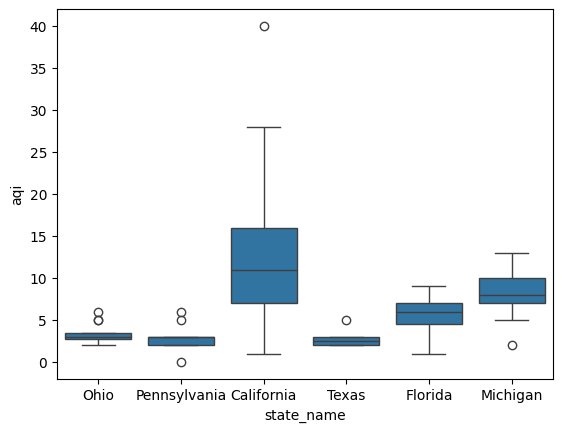

In [41]:
# Import seaborn as sns.

import seaborn as sns

sns.boxplot(x='state_name', y='aqi', data=aqi_rre)


### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

In [42]:
# Code Here



**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

 A: To answer this we need to see which states have a mean AQI above 10. This is only California and will be most benefitted by this

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for CA.

In [44]:
# Find the mean aqi for CA state.
aqi_ca = aqi[aqi['state_name'] == 'California']
mean_aqi_ca = aqi_ca['aqi'].mean()

print (mean_aqi_ca)


12.121212121212121


### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [15]:
# Input your confidence level here:

confidence_level = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [51]:
# Calculate your margin of error.


# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96

# Next, calculate your standard error.
estimated_standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi.shape[0])

# Lastly, use the preceding result to calculate your margin of error.

margin_of_error = z_value * estimated_standard_error

print ("Margin of error is:", margin_of_error)


Margin of error is 0.8926605659987829


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [52]:
# Calculate your confidence interval (upper and lower limits).

lower_limit = mean_aqi_ca - margin_of_error
upper_limit = mean_aqi_ca + margin_of_error

print ("The 95% confidence interval for California is: ", lower_limit, "and ", upper_limit)


The 95% confidence interval for California is:  11.228551555213338 and  13.013872687210904


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [49]:
# Import stats from scipy.

from scipy import stats
stats.norm.interval(0.95, loc=mean_aqi_ca, scale=estimated_standard_error)

(11.25422052818272, 12.988203714241521)

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [53]:
# Code Here
confidence_level = 0.95
sample_mean = aqi_ca['aqi'].mean()
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])

lower_limit, upper_limit = stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

print ("The recalculated 95% confidence interval for California is: ", lower_limit, "and ", upper_limit)
print ("Sample mean for CA", sample_mean)
print ("Standard Error", standard_error)

The recalculated 95% confidence interval for California is:  10.359751399400034 and  13.882672843024208
Sample mean for CA 12.121212121212121
Standard Error 0.8987209641127412


# Considerations

**What are some key takeaways that you learned from this project?**

A: How to calculate margin of error, and standard error. Also how to break down a larger data set into particular unique values to analyze them in particular like we did with the RRE states

**What findings would you share with others?**

A: I would share the different means for all the states that we have found and California having the highest. Using two methods, both say that CA average AQI is above 10 and hence can benefit from the policy change. California data has the most variability. Only single days data

**What would you convey to external readers?**

A: I would convey that this analysis tells us that California can benefit the most form this policy out of the other states in this scope.California’s average AQI is 12.12, well above the threshold, and our statistical analysis confirms with 95% confidence that its true mean lies between 10.36 and 13.88. This makes it a strong candidate for renewable energy investment to address public health risks from air pollution.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 